In [75]:
# Load all the necessary libraries 
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the file
airport=pd.read_csv('D:/Machine Learning/airport.csv')

In [76]:
# Check the number of rows and columns 
airport.shape

(19, 13)

In [77]:
# View the dataset
print(airport)

    year     dep     arr  dep_dem  arr_dem  eff_aar     adr  cap_aar     cap  \
0   2000  172170  158570   215157   175647   339821  368792   339821  708613   
1   2001  147010  133806   176997   144244   320077  336135   320077  656212   
2   2002  142779  129089   169072   138061   317088  343905   317088  660993   
3   2003  140023  126800   168626   138507   303844  337738   303844  641582   
4   2004  161351  160474   203993   179710   302256  337324   302256  639580   
5   2005  176738  176139   249869   209219   322701  321895   322836  644731   
6   2006  191852  191288   326131   237164   335796  331485   337419  668904   
7   2007  222946  222505   407468   332520   365119  343131   370455  713586   
8   2008  221203  221458   352677   325057   365838  359354   372714  732068   
9   2009  209595  209710   312026   288945   373893  350917   380245  731162   
10  2010  200902  200595   277480   253438   349015  333458   351570  685028   
11  2011  205231  204685   266431   2630

In [78]:
# Create a data frame
airport=pd.DataFrame(airport, columns=['caputil', 'dep'])
# Define X and Y
X=pd.DataFrame(airport['caputil'])
Y=pd.DataFrame(airport['dep'])

In [60]:
# Define the model
reg = LinearRegression()

In [61]:
# Determine three folds
scores=[]
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

In [62]:
# Create the iteration for the three folds
for i, (train, test) in enumerate(kfold.split(X, Y)):
    reg.fit(X.iloc[train,:], Y.iloc[train,:])
    score = reg.score(X.iloc[test,:], Y.iloc[test,:])
    scores.append(score)
print(scores)

[0.9029142706220207, 0.9048352664783202, 0.5119143545760048]


In [63]:
# Determine the coefficient of determination with sklearn
reg = LinearRegression().fit(X, Y)
print('Coefficient of Determination:', reg.score(X, Y))

Coefficient of Determination: 0.8897612752328166


In [64]:
# Determine the coefficient for X
print('Coefficients:', reg.coef_)

Coefficients: [[4202.71508638]]


In [65]:
# Determine the intercept
print('Intercept:', reg.intercept_)

Intercept: [-33354.0929305]


In [66]:
# Predict the Y values
Y_pred=reg.predict(Y)

In [67]:
# Determine the values
print('Predicted Values: ',Y_pred)

Predicted Values:  [[7.23548102e+08]
 [6.17807791e+08]
 [6.00026103e+08]
 [5.88443420e+08]
 [6.78078928e+08]
 [7.42746105e+08]
 [8.06265941e+08]
 [9.36945164e+08]
 [9.29619831e+08]
 [8.80834714e+08]
 [8.44300512e+08]
 [8.62494066e+08]
 [8.50722261e+08]
 [8.56471575e+08]
 [8.95619866e+08]
 [9.25076696e+08]
 [9.49734026e+08]
 [9.37701652e+08]
 [9.55769124e+08]]


In [81]:
# Visualize predicted errors
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(reg, X, Y, cv=10)

In [83]:
# Determine the predicted errors
print('Predicted Errors: ', predicted)

Predicted Errors:  [[160835.55508042]
 [143928.21704009]
 [138393.80845549]
 [140358.20860634]
 [180662.82450213]
 [198806.56295092]
 [209181.70395083]
 [231558.86084681]
 [220561.15973044]
 [207488.73277439]
 [214087.71393934]
 [207154.97715331]
 [193506.03241906]
 [195900.52219425]
 [204795.19251424]
 [215536.69965656]
 [210137.99688364]
 [214613.01298902]
 [216056.74708452]]


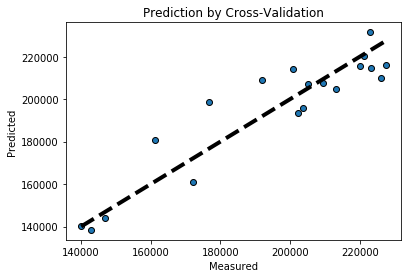

In [84]:
# Create a graph of the predicted versus cross-validated errors
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(Y, predicted, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction by Cross-Validation', fontdict=None, loc='center', pad=None)
plt.show()

In [70]:
# Method 2 Using Statsmodels
import statsmodels.api as sm
from scipy import stats

In [71]:
# Add a constant
X2 = sm.add_constant(X) 
# Define the model
est = sm.OLS(Y, X2)
# Fit the model
est2 = est.fit()
print("summary()\n",est2.summary())
print("pvalues\n",est2.pvalues)
print("tvalues\n",est2.tvalues)
print("rsquared\n",est2.rsquared)
print("rsquared_adj\n",est2.rsquared_adj)

summary()
                             OLS Regression Results                            
Dep. Variable:                    dep   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     137.2
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           1.45e-09
Time:                        09:08:05   Log-Likelihood:                -201.11
No. Observations:                  19   AIC:                             406.2
Df Residuals:                      17   BIC:                             408.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.335e+04   1.96e+04     -1.6

C:\Users\Tony Diana\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Tony Diana\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


In [85]:
# Determine predicted values and R-squared with scikitlearn
from sklearn.metrics import r2_score
predictions = est2.predict(X2)

print(est2.predict(X2))

print("r2_score",r2_score(Y,predictions))

0     162786.620151
1     146480.085616
2     139503.578572
3     141436.827512
4     178126.530216
5     196660.503747
6     207377.427217
7     228979.382761
8     220784.088343
9     207671.617273
10    212967.038282
11    206158.639842
12    194391.037600
13    196786.585199
14    205612.286881
15    216497.318955
16    211958.386661
17    216581.373256
18    217043.671916
dtype: float64
r2_score 0.8897612752328166
